In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import rle_encode, rle_decode, rle_to_string

%matplotlib inline

/home/r00t/.pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/r00t/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def test_image(df, image_id, plot=False):
    image = cv2.imread('stage1_test/' + image_id + '/images/' + image_id + '.png')
    shape = image.shape[:2]
    for rle in df[df.ImageId == image_id].EncodedPixels:
        try:
            decoded_result = rle_decode(rle, shape)
            plt.figure()
            plt.imshow(image)
            plt.figure()
            plt.imshow(decoded_result)
        except Exception as e:
            print(e)
            print(image_id)
            print('---')

In [3]:
df = pd.read_csv('submission.csv')
df.head()

,ImageId,EncodedPixels
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,27734 4 27990 5 28246 5 28502 5 28759 3
1,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,31133 3 31388 5 31644 5 31900 5 32156 5 32412 ...
2,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,45106 4 45359 9 45614 11 45869 13 46125 13 463...
3,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,38820 4 39075 6 39329 8 39584 9 39839 10 40094...
4,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,50535 8 50790 10 51044 13 51299 14 51554 15 51...


/home/r00t/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


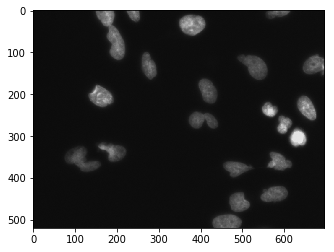

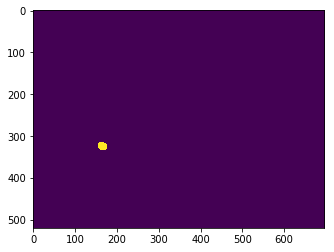

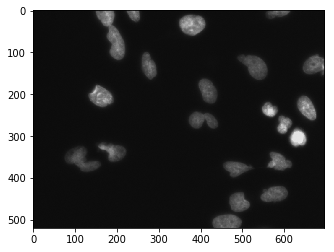

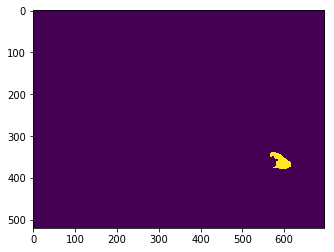

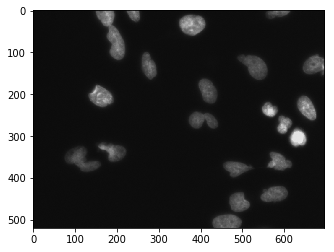

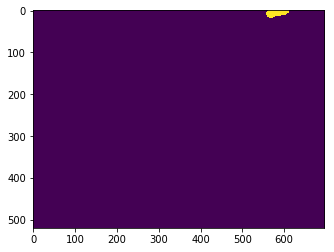

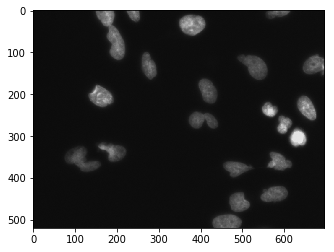

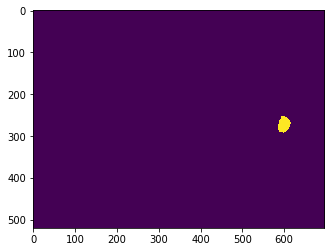

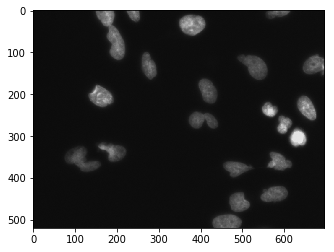

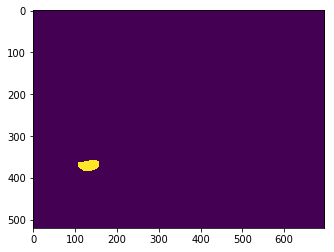

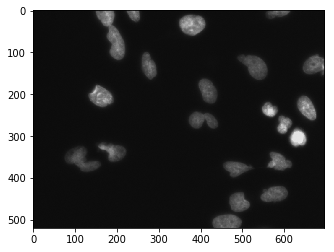

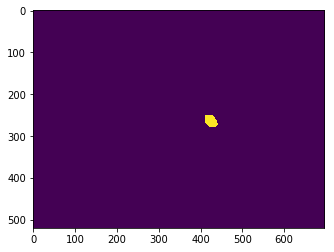

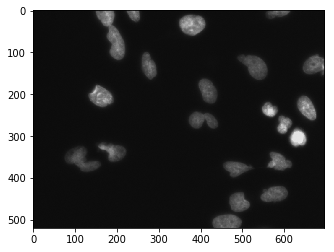

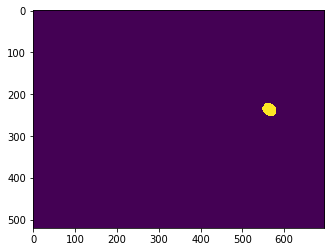

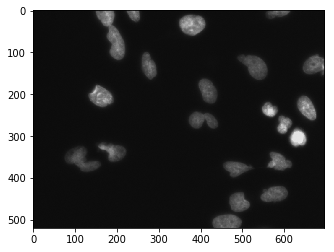

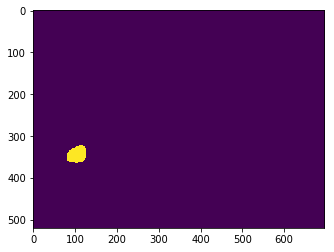

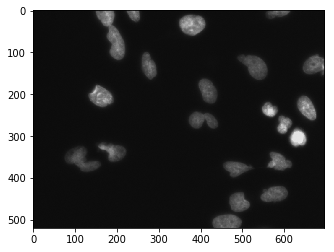

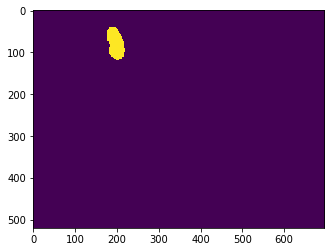

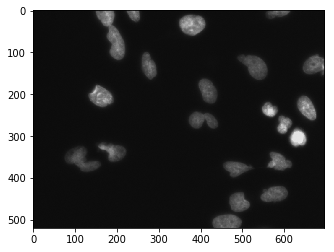

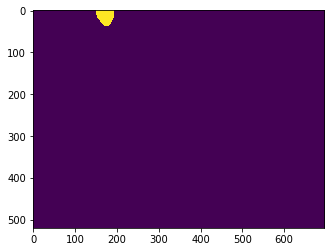

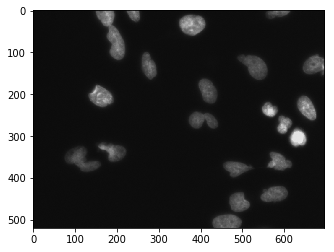

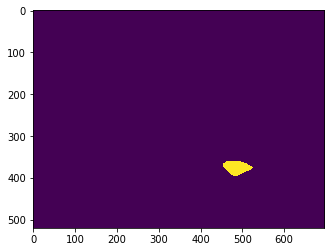

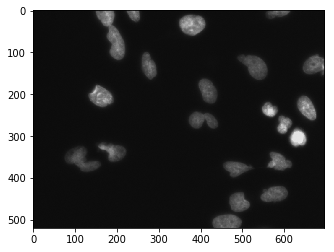

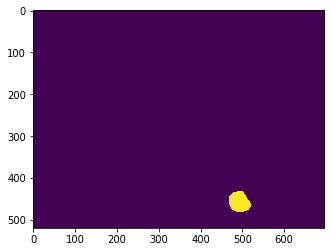

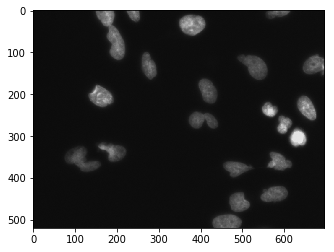

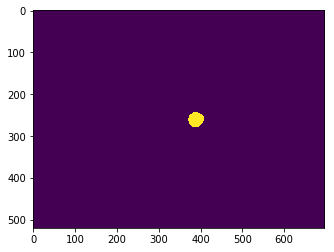

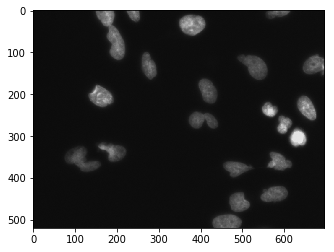

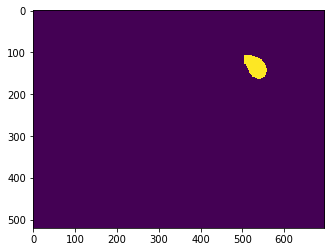

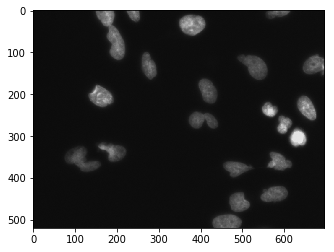

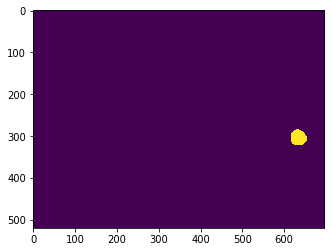

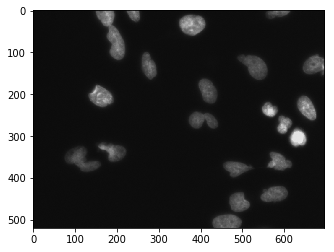

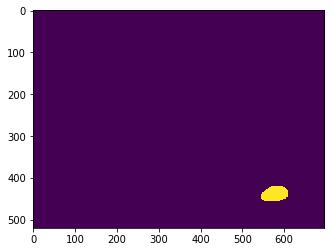

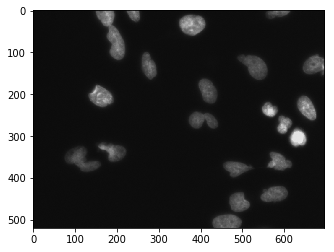

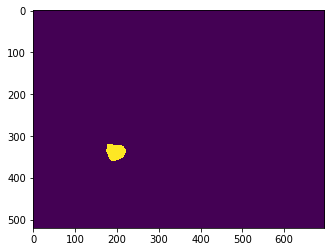

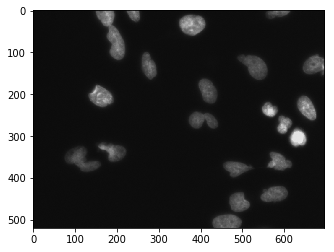

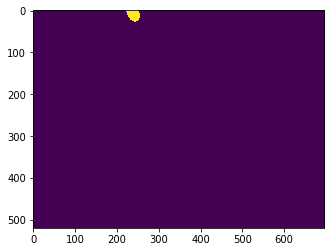

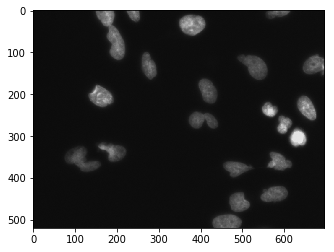

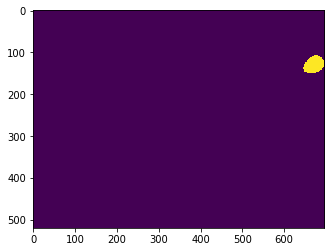

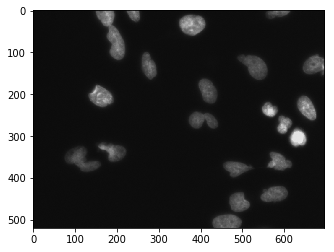

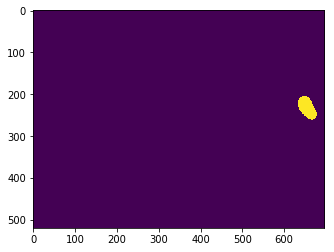

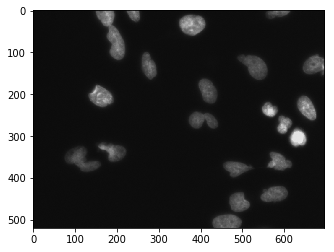

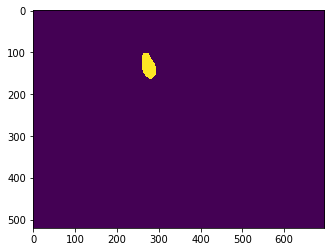

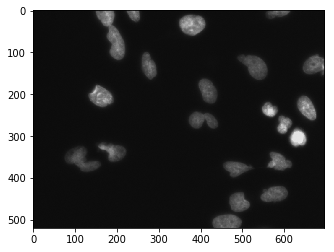

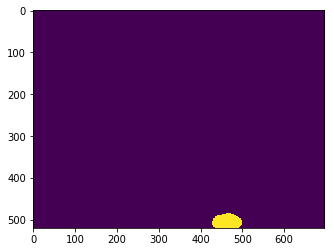

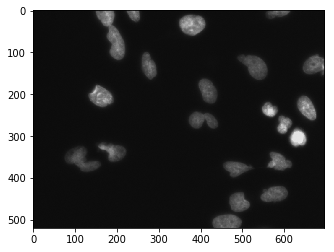

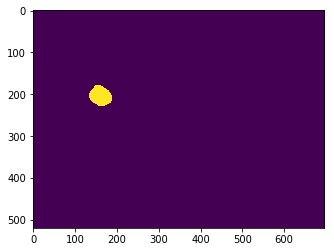

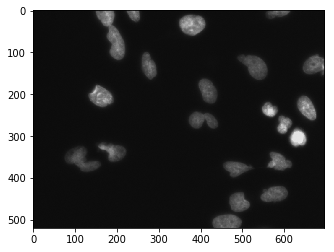

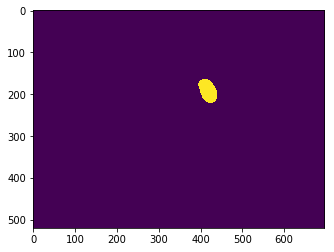

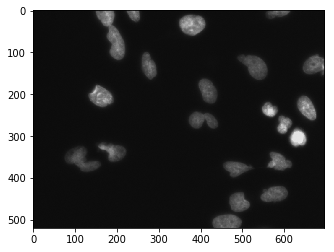

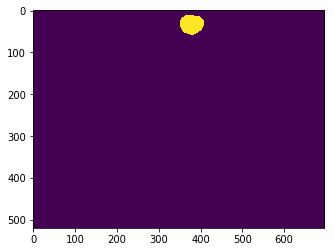

In [4]:
for image_id in df.ImageId.unique()[50:51]:
    test_image(df, image_id)